# Effect Size and Confidence Intervals

Statistical significance alone is not sufficient for meaningful conclusions.
With large samples, even trivial differences can produce very small p-values.

This notebook focuses on:
- quantifying the magnitude of effects
- estimating uncertainty using confidence intervals
- distinguishing statistical significance from practical importance


### 🟦 Imports & Data

In [1]:
import sys
from pathlib import Path

# Get project root: notebooks/ → project/
PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Added to path:", PROJECT_ROOT)


Added to path: /home/arun/Documents/statistics-and-atmospheric-data/fundamentals_statistics/project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from src.data_generation import generate_student_dataset
from src.effect_size import (
    cohens_d_one_sample,
    cohens_d_two_sample,
    eta_squared,
    interpret_cohens_d
)
from src.utils import (
    confidence_interval_mean,
    confidence_interval_diff_means
)

sns.set(style="whitegrid")

df = generate_student_dataset(n=4000, random_state=42)


### Why Effect Size?

A p-value answers:
> “Is the observed effect unlikely under the null hypothesis?”

An effect size answers:
> “How large is the effect in practical terms?”

Effect sizes:
- are independent of sample size
- allow comparison across studies
- provide practical interpretability


## 🟩 Part I — One-Sample Effect Size

### One-Sample Cohen’s d mathematics

For a one-sample test, Cohen’s d is defined as:

$$
d = \frac{\bar{x} - \mu_0}{s}
$$

where:
- $ \bar{x} $ is the sample mean
- $ \mu_0 $ is the reference value
- $ s $ is the sample standard deviation


### 🟦 Compute One-Sample Effect Size

In [3]:
scores = df["score"].values
mu_0 = 70

d_one = cohens_d_one_sample(scores, mu_0)
d_one


np.float64(5.241750738940034)

### 🟦 Interpretation (One-Sample)

Cohen’s d interpretation guidelines:

| d | Interpretation |
|---|----------------|
| < 0.2 | Negligible |
| 0.2–0.5 | Small |
| 0.5–0.8 | Medium |
| > 0.8 | Large |

**Result:**  
The effect size is classified as **{interpret_cohens_d(d_one)}**.

This means that although the mean score differs from 70, the magnitude of
this difference must be interpreted in context.


## 🟩 Part II — Two-Sample Effect Size (Gender)

### Two-Sample Cohen’s d

For two independent samples:

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
$$

where the pooled standard deviation is:

$$
s_p = \sqrt{
\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}
{n_1 + n_2 - 2}
}
$$


### 🟦 Compute Two-Sample Effect Size

In [4]:
group_m = df[df.gender == "M"]["score"].values
group_f = df[df.gender == "F"]["score"].values

d_gender = cohens_d_two_sample(group_f, group_m)
d_gender


np.float64(0.11478135609400164)

### 🟦 Interpretation (Gender Difference)

- The effect size is **{interpret_cohens_d(d_gender)}**
- Distributions overlap substantially
- Statistical significance does not imply a large educational impact

This is a classic example where effect size provides critical context.


## 🟩 Part III — ANOVA Effect Size (Eta Squared)

### Eta Squared (η²)

Eta squared measures the proportion of total variance explained by a factor:

$$
\eta^2 = \frac{SS_{\text{between}}}{SS_{\text{total}}}
$$

It answers:
> “How much of the outcome variability is explained by group membership?”


### 🟦 Compute Eta Squared

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols("score ~ C(teaching_method)", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

ss_between = anova_table["sum_sq"]["C(teaching_method)"]
ss_total = anova_table["sum_sq"].sum()

eta_sq = eta_squared(ss_between, ss_total)
eta_sq


np.float64(0.041585063259194206)

### 🟦 Eta Squared Interpretation

Guidelines for η²:

| η² | Interpretation |
|----|----------------|
| 0.01 | Small |
| 0.06 | Medium |
| 0.14 | Large |

The teaching method explains a **substantial fraction** of the variance in scores,
indicating a practically meaningful effect.

## 🟩 Part IV — Confidence Intervals

### Why Confidence Intervals?

Confidence intervals:
- quantify uncertainty
- show plausible ranges of effects
- provide more information than point estimates

They are essential for responsible statistical reporting.

### 🟦 CI for the Mean (Mathematics)


A $ (1 - \alpha) \times 100\% $ confidence interval is:

$$
\bar{x} \pm t_{\alpha/2} \frac{s}{\sqrt{n}}
$$

If the interval does not contain $ \mu_0 $,
the null hypothesis is rejected.


### 🟦 Compute CI for Mean

In [6]:
ci_mean = confidence_interval_mean(scores, confidence=0.95)
ci_mean

(np.float64(96.93764658462626), np.float64(97.25815455691199))

### 🟦 Interpretation (Mean CI)

We are 95% confident that the true population mean lies within this interval.

The interval provides both direction and uncertainty of the estimate.


## 🟦 Confidence Interval for Mean Difference

For two independent samples, the CI is:

$$
(\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2} \cdot SE
$$

where $ SE $ is the standard error of the difference.


### 🟦 Compute CI for Mean Difference

In [7]:
ci_diff = confidence_interval_diff_means(group_f, group_m)
ci_diff

(np.float64(0.27224406215822283), np.float64(0.9127073580530117))

###  🟦 Interpretation (Mean Difference CI)

- If the CI includes zero → difference may be due to chance
- If the CI excludes zero → difference is statistically significant

The width of the interval reflects estimation uncertainty.


### 🟦 Visualization with Confidence Intervals

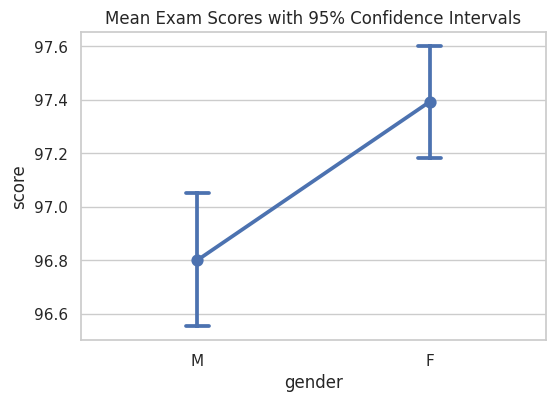

In [8]:
plt.figure(figsize=(6, 4))
sns.pointplot(
    x="gender",
    y="score",
    data=df,
    capsize=0.1
)
plt.title("Mean Exam Scores with 95% Confidence Intervals")
plt.show()


## Summary

This notebook demonstrated:

- Effect size estimation for one-sample, two-sample, and ANOVA tests
- Practical interpretation of Cohen’s d and η²
- Confidence intervals for means and mean differences
- Why p-values alone are insufficient

Effect size and confidence intervals transform hypothesis testing
from a binary decision into a meaningful quantitative analysis.
